# Scraping COVID-19 data--Step by step coding
## Prepared by: MD KAMRUL ISLAM

In [1]:
# Importing neccessary library
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

In [2]:
# Connecting with url and creating soup
url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
response

<Response [200]>


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="6
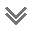

In [3]:
# Creating soup
soup = BeautifulSoup(response.content, 'html.parser')
soup

In [4]:
# Getting table coulmns
table = soup.find_all("table", id ="main_table_countries_today")[0]
columns = table.find("thead").find_all("th")
final_columns = [final_columns.text for final_columns in columns]
final_columns

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [5]:
# Getting table raws
table_rows  = table.find("tbody").find_all("tr")
table_rows

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>68,570,434</td>
 <td>+15,584</td>
 <td>1,250,397</td>
 <td>+130</td>
 <td>50,808,046</td>
 <td>+3,401</td>
 <td>16,511,991</td>
 <td>26,141</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <td>
 </td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>85,262,029</td>
 <td>+11,423</td>
 <td>1,258,713</td>
 <td>+87</td>
 <td>82,211,238</td>
 <td>+8,105</td>
 <td>1,792,078</td>
 <td>27,561</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="display:none;">Asia</td>
 <td>
 </td>
 <td></td>
 <td></td>
 <td></td>
 <td

In [6]:
# Using emapty list and for loop to add value in the rows  
covid=[]
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text.strip() for tr in td]
    covid.append(row)
#Creatign pandas data frame
intial_covid_data = pd.DataFrame(covid,  columns = final_columns)
intial_covid_data.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,North America,"68,570,434","+15,584","1,250,397",+130,"50,808,046","+3,401","16,511,991","26,141",...,,,,North America,,,,,,
1,,Asia,"85,262,029","+11,423","1,258,713",+87,"82,211,238","+8,105","1,792,078","27,561",...,,,,Asia,,,,,,
2,,South America,"40,136,556","+10,062","1,193,110",+49,"37,745,773","+1,348","1,197,673","13,035",...,,,,South America,,,,,,
3,,Europe,"90,890,468","+18,630","1,537,449",+22,"76,137,192","+64,707","13,215,827","22,476",...,,,,Europe,,,,,,
4,,Africa,"9,964,332",+215,"229,978",,"8,828,092",+82,"906,262","2,250",...,,,,Africa,,,,,,


In [7]:
### Creating subset table keeping necessary columns only
covid_data = intial_covid_data[["Country,Other","TotalCases", "NewCases", "TotalDeaths","NewDeaths", "TotalRecovered" ]]
# Show data in table
covid_data.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered
0,North America,"68,570,434","+15,584","1,250,397",+130,"50,808,046"
1,Asia,"85,262,029","+11,423","1,258,713",+87,"82,211,238"
2,South America,"40,136,556","+10,062","1,193,110",+49,"37,745,773"
3,Europe,"90,890,468","+18,630","1,537,449",+22,"76,137,192"
4,Africa,"9,964,332",+215,"229,978",,"8,828,092"


# Scraping COVID-19 data(all program and code togather)

In [8]:
# Importing neccessary library
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
# Connecting with url and creating soup
url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.content, 'html.parser')
# Getting table coulmns
table = soup.find_all("table", id ="main_table_countries_today")[0]
columns = table.find("thead").find_all("th")
final_columns = [final_columns.text for final_columns in columns]
# Getting table raws
table_rows  = table.find("tbody").find_all("tr")

# Using emapty list and for loop to add value in the rows  
covid=[]
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text.strip() for tr in td]
    covid.append(row)
#Creatign pandas data frame
intial_covid_data = pd.DataFrame(covid,  columns = final_columns)
intial_covid_data.head()
covid_data = intial_covid_data[["Country,Other","TotalCases", "NewCases", "TotalDeaths","NewDeaths", "TotalRecovered" ]]
# Exporting data as csv file 
covid_data.to_csv("C:\\Users\\msi\\Desktop\\Covid_data.csv")
# Show data in table
covid_data

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered
0,North America,"68,570,434","+15,584","1,250,397",+130,"50,808,046"
1,Asia,"85,262,029","+11,423","1,258,713",+87,"82,211,238"
2,South America,"40,136,556","+10,062","1,193,110",+49,"37,745,773"
3,Europe,"90,890,468","+18,630","1,537,449",+22,"76,137,192"
4,Africa,"9,964,332",+215,"229,978",,"8,828,092"
...,...,...,...,...,...,...
227,Samoa,3,,,,3
228,Saint Helena,2,,,,2
229,Micronesia,1,,,,1
230,Tonga,1,,,,1
